In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider

from boundary import plot_decision_boundary
from gaussian import n_gaussians

np.random.seed(0)

In [2]:
X, Y = n_gaussians(np.array([[0.8, 0.2],[0.2, 0.8]]), np.array([-1, 1]), 20, stddev=0.1)

<IPython.core.display.Javascript object>


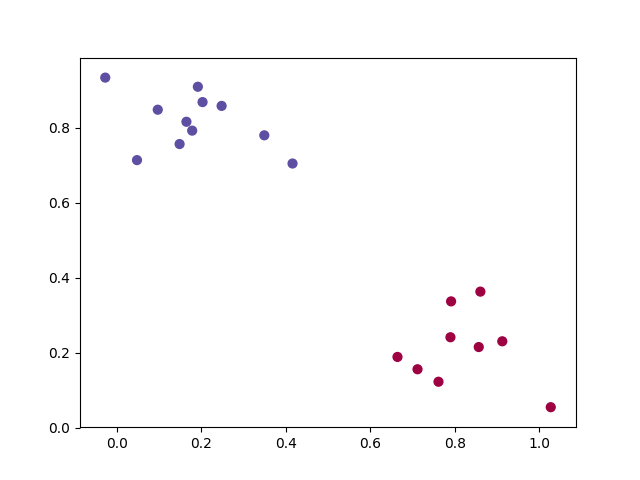

In [3]:
plt.scatter(X[::,0], X[::,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [4]:
def classify(w, b, x):
    if w @ x + b >= 0:
        return 1
    else:
        return -1

In [5]:
def update(w, b, x, y):
    y_p = classify(w, b, x)
    if y_p != y:
        w += y * x
        b += y

<IPython.core.display.Javascript object>


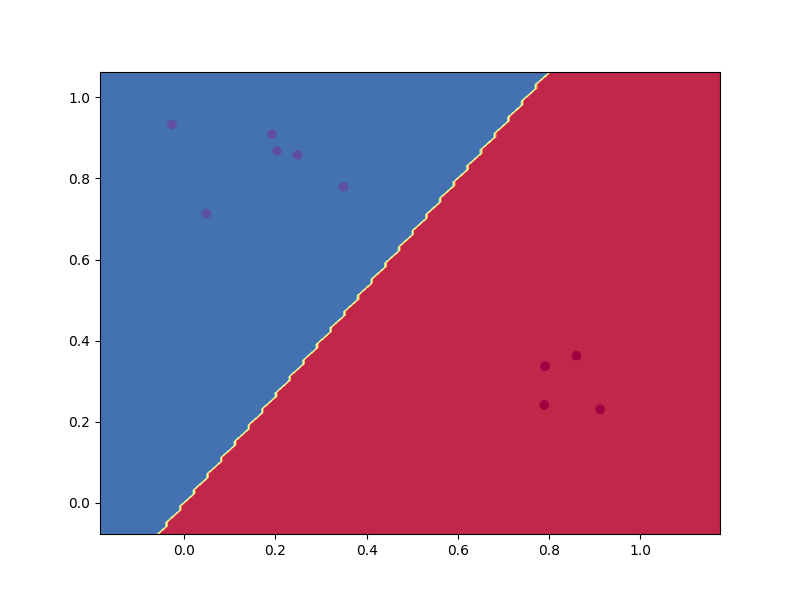

<function __main__.plot_n_iterations>

In [6]:
fig = plt.figure(figsize=(8, 6))
sub = fig.add_subplot(111)

def plot_n_iterations(n):
    w = np.zeros((X[0].shape[0]))
    b = np.zeros(())
    for i in range(n):
        update(w, b, X[i], Y[i])

    plot_decision_boundary(sub, lambda x: classify(w, b, x), X[:n], Y[:n],
                           x_range = (X[:,0].min(), X[:,0].max()),
                           y_range = (X[:,1].min(), X[:,1].max()))
    
interact(plot_n_iterations,
         n=IntSlider(min=0, max=X.shape[0], step=1, value=0))